# BISI CST2101 Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age in years
* Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

### Q1: Import the necessary libraries and briefly explain the use of each library (1 Mark)

In [1]:
# remove _____ & write the appropriate library name

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# You don't have to explain about these libraries below
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Write your Answer here: 

Ans 1: import Python libraries for various tasks: NumPy for arrays, Pandas for dataframes, Seaborn and Matplotlib for data visualization. Using "%matploblib inline" so that graphs will be displayed as we run the data exploration code

### Q2: Read the given dataset (1 Mark)

In [2]:
#remove _____ & write the appropriate function name

pima = pd.read_csv("diabetes.csv")

### Q3. Show the last 5 records of the dataset (1 Mark)

In [3]:
#remove ______ and write the appropriate number in the function

pima.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
995,2,173,79,32,474,35.504233,0.402867,21,1
996,13,132,70,30,111,35.271769,0.168845,42,1
997,3,132,87,44,156,34.794755,0.765003,29,1
998,0,140,0,0,0,41.926693,0.209833,28,1
999,4,93,59,35,93,45.914499,0.737636,29,1


### Q4. Show the first 5 records of the dataset (1 Mark)

In [4]:
#remove _____ & write the appropriate function name and the number of rows to get in the output

pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Q5. Find the dimension of the `pima` dataframe. What do you understand by the dimension of the dataset? (1 Mark)

In [9]:
#remove _____ & write the appropriate function name

pima.shape

(1000, 9)

Ans 5:pima dataframe has 1,000 rows and 9 columns

### Q6. Find the size of the `pima` dataframe. (1 Mark)

In [8]:
#remove _____ & write the appropriate function name

pima.size

9000

#### Write your Answer here: 


Ans 6:pima dataframe has 9,000 data points

### Q7. Display the data types of all the variables in the data set? (1 Mark)


In [16]:
#remove _____ & write the appropriate function name

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Q8. Are there any missing values in the `pima` dataframe?  Which variables have missing values? (1 Mark)

In [14]:
#remove _____ & write the appropriate function name

pima.isnull().values.any()

False

#### Write your Answer here: 


Ans 8: There is no missing value in the pima dataframe.

### Q9. Find the summary statistics for all variables except for  `'Outcome'` variable? Choose any one column/variable and explain all the statistical measures. (2 Marks)

In [20]:
## remove _____ & write the appropriate function name

pima.iloc[:,:-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.051000,125.21600,69.072000,20.755000,83.086000,32.664772,0.494090,33.830000
std,3.325576,32.27772,20.465328,16.008599,117.255326,7.563614,0.322158,11.268189
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,102.00000,64.000000,0.000000,0.000000,28.275000,0.258750,25.000000
50%,3.000000,122.00000,72.000000,24.000000,23.000000,32.800000,0.408500,30.000000
75%,6.000000,146.00000,80.000000,33.000000,133.500000,36.900000,0.658500,41.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#### Write your Answer here: 


Ans 9: taking BMI as an example, there are 1,000 records - another proof of no missing value, the average of BMI in 1,000 records is 32.664772, other statistics displayed including quatiles, maxmimum and minimum values of BMI

### Q10. Plot the distribution plot for the variable `'BloodPressure'`. Write your observations from the plot. (2 Marks)

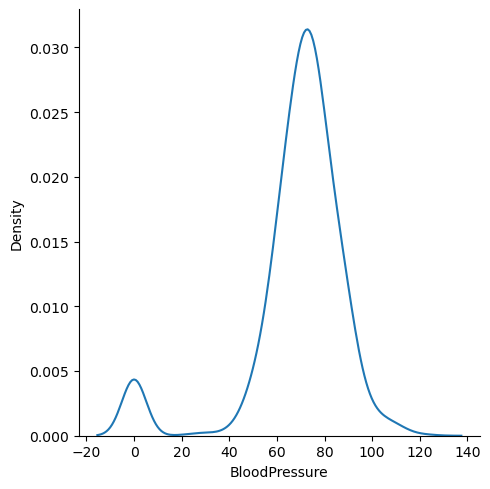

In [21]:
#remove _____ & write the appropriate library name

sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

#### Write your Answer here: 


### Q11. What is the `'BMI'` for the person having the highest `'Glucose'`? (1 Mark)

In [22]:
#remove _____ & write the appropriate function name

pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

#### Write your Answer here: 


Ans 11: the corresponding BMI for the highest glucose is 42.9

### Q12.
#### 12.1 What is the mean of the variable `'BMI'`? 
#### 12.2 What is the median of the variable `'BMI'`? 
#### 12.3 What is the mode of the variable `'BMI'`?
#### 12.4 Are the three measures of central tendency equal?

### (2 Marks)

In [23]:
#remove _____ & write the appropriate function name

m1 = pima['BMI'].mean()  #Mean
print(m1)
m2 = pima['BMI'].median()  #Median
print(m2)
m3 = pima['BMI'].mode()[0]  #Mode
print(m3)

32.664772391408796
32.8
32.0


#### Write your Answer here: 


Ans 12:12.1 What is the mean of the variable 'BMI'? 32.664772391408796

12.2 What is the median of the variable 'BMI'? 32.8

12.3 What is the mode of the variable 'BMI'? 32.0

12.4 Are the three measures of central tendency equal? No.

### Q13. How many women's `'Glucose'` level is above the mean level of `'Glucose'`? (1 Mark)

In [24]:
#remove _____ & write the appropriate function name

pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

449

#### Write your Answer here: 


Ans 13: 449 women's glucose level is above the mean level of glucose.

### Q14. Create the pairplot for variables `'Glucose'`, `'SkinThickness'` and `'DiabetesPedigreeFunction'`. Write you observations from the plot. (2 Marks)

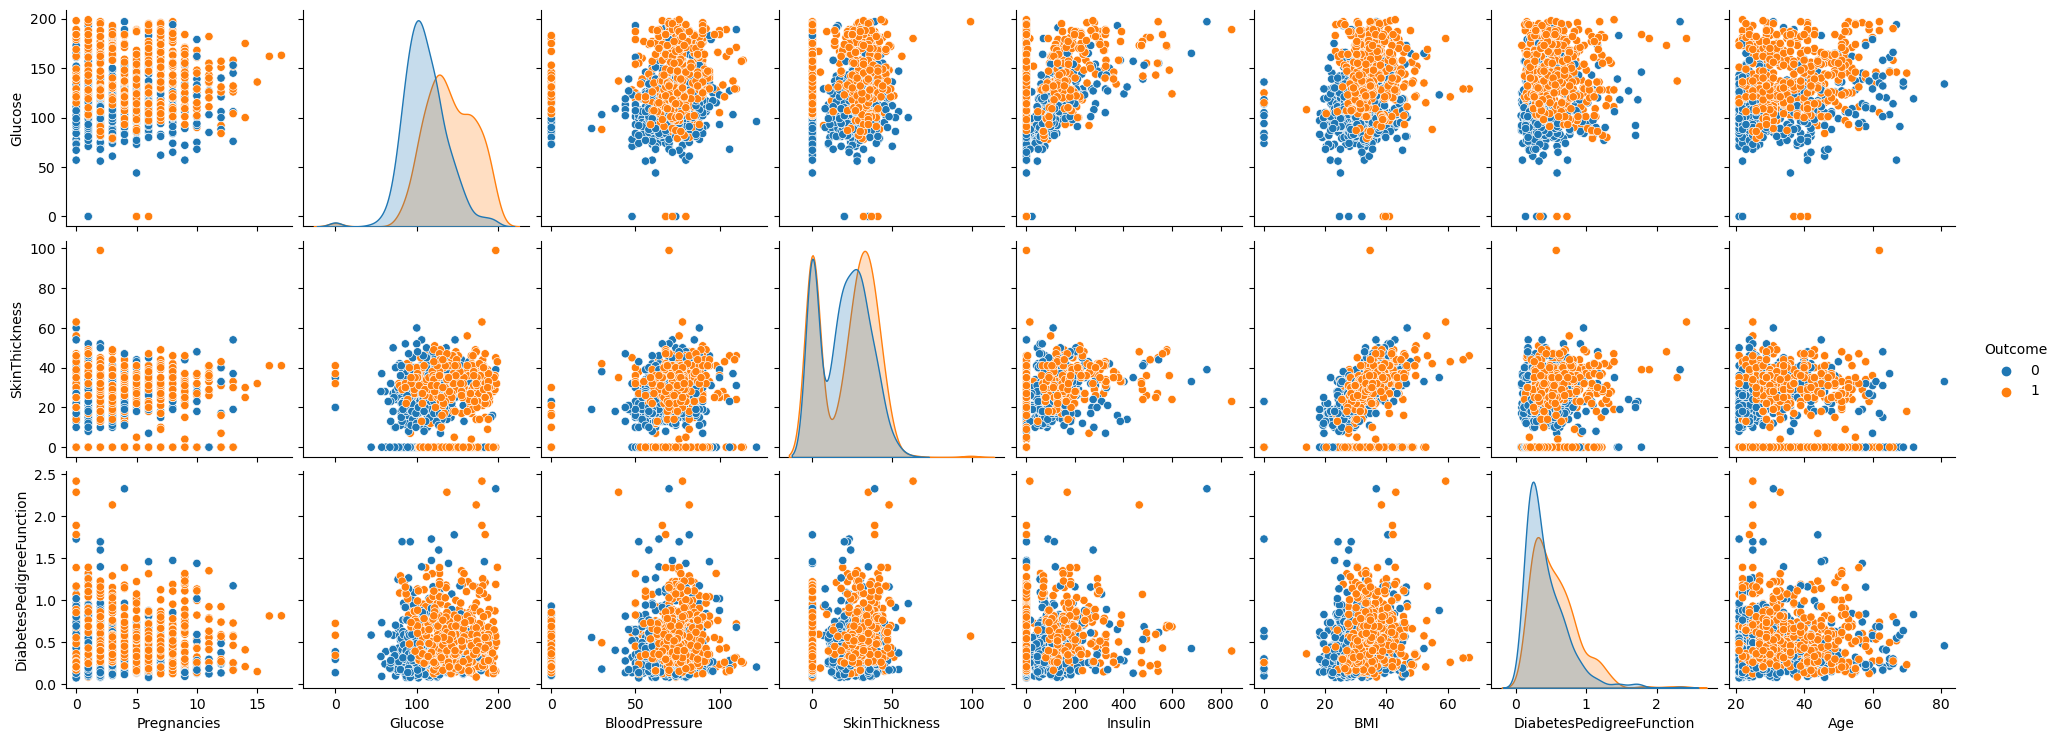

In [25]:
#remove _____ & write the appropriate function and argument names

sns.pairplot(data=pima, y_vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

#### Write your Answer here: 


Ans 14:My observation is that there are three features standing out with higher positive corelation to diabetes: pregnancy, high glucose, and high BMI.

### Q15. Plot the scatterplot between `'Glucose'` and `'Insulin'`. Write your observations from the plot. (1 Mark)

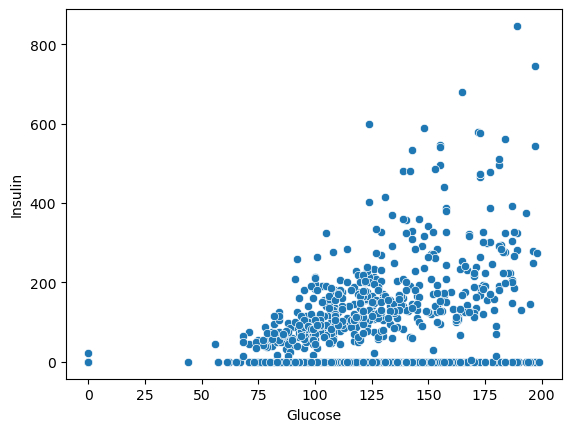

In [26]:
#remove _____ & write the appropriate function name

sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

#### Write your Answer here: 


Ans 15: the usage of insulin seems to have a positive correlation with the glucose value. Since the are zero insulin values throughout the glucose values, I suspect there are people who should have been treated with insulin had not received proper medication.

### Q16. Plot the boxplot for the 'Age' variable. Are there outliers? (1 Mark)

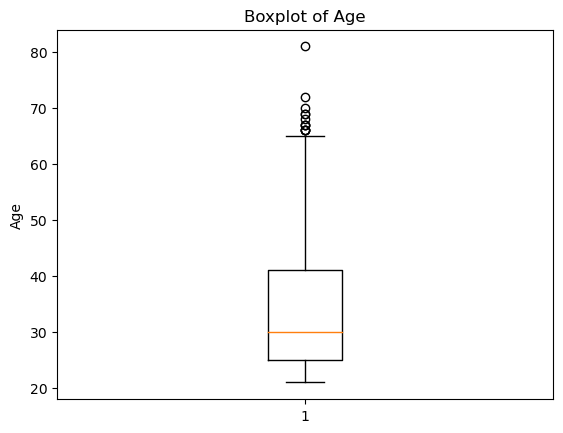

In [28]:
#remove _____ & write the appropriate function and column name 

plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

#### Write your Answer here: 


Ans 16: There are some outlier values over 65.

### Q17. Find and visualize the the correlation matrix. Write your observations from the plot. (1 Mark)

In [29]:
#remove _____ & write the appropriate function name and run the code

corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.112930,0.127463,-0.080033,-0.064909,0.012920,-0.025452,0.548665
Glucose,0.112930,1.000000,0.134993,0.050656,0.334175,0.222138,0.127004,0.255567
BloodPressure,0.127463,0.134993,1.000000,0.249063,0.117369,0.247275,0.059303,0.240416
SkinThickness,-0.080033,0.050656,0.249063,1.000000,0.472663,0.387055,0.214026,-0.121236
Insulin,-0.064909,0.334175,0.117369,0.472663,1.000000,0.198281,0.180284,-0.039887
BMI,0.012920,0.222138,0.247275,0.387055,0.198281,1.000000,0.163270,0.023921
DiabetesPedigreeFunction,-0.025452,0.127004,0.059303,0.214026,0.180284,0.163270,1.000000,0.006809
Age,0.548665,0.255567,0.240416,-0.121236,-0.039887,0.023921,0.006809,1.000000


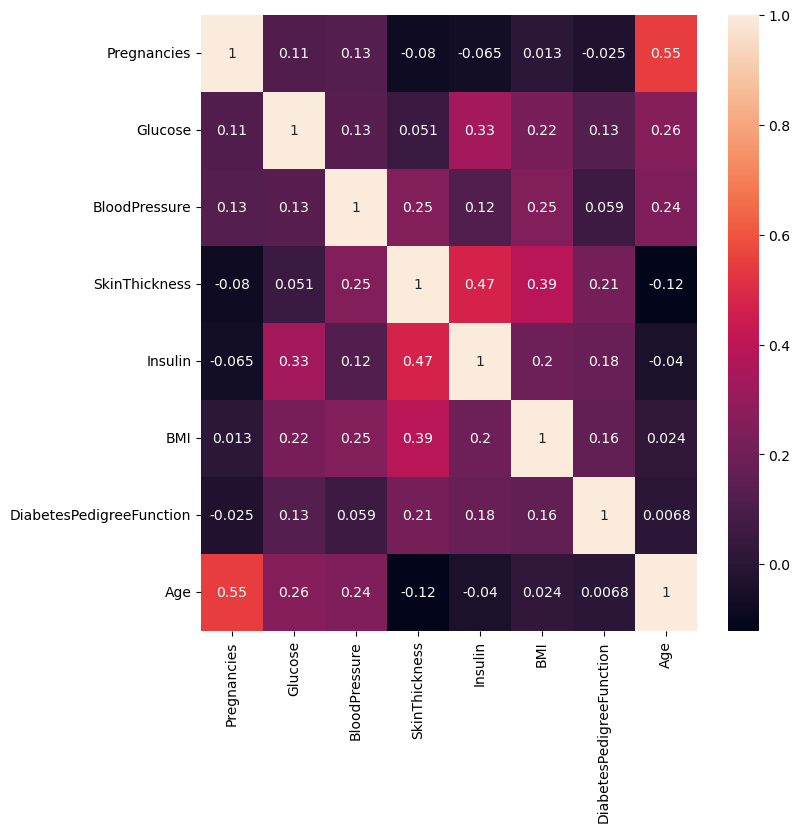

In [30]:
#remove _____ & write the appropriate function name

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

#### Write your Answer here: 


Ans 17: One negative correlation value between insulin and pregnancy stands out, which makes sense, that a pregnant woman is not supposed to administer insulin.

## Model Training

### Q18. Split and scale the data (2 Mark)

In [41]:
# Split the data into dependent and independent variables
# remove _____ & write the appropriate function variable name
y = pima.iloc[:, -1].values
x = pima.drop('Outcome', axis = 1)

In [42]:
# Using StandarScaler scale the data
# remove _____ & write the appropriate function function name

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [43]:
# Splitting the data into train and test. Use test size as 15%
# remove _____ & complete the code

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, stratify=y,  random_state = 45)

### Q19. Train a Logistic Regression Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [44]:
# remove _____ & complete the code

# import the model
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr = LogisticRegression(max_iter=1000)

# fit the model on the train set
m = lr.fit(x_train, y_train)

# Predict on x_test
y_pred = m.predict(x_test)

# Evaluate the model
print('Accuracy of Logistic Regression model on the train set: {:.2f}'.format(m.score(x_train, y_train)))
print('Accuracy of the Logictic Regression model on the test set: {:.2f}'.format(m.score(x_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Accuracy of Logistic Regression model on the train set: 0.76
Accuracy of the Logictic Regression model on the test set: 0.75


array([[60, 15],
       [22, 53]], dtype=int64)

#### Write your Answer here: 


Ans 19: acuracy on the train set is 0.76; acuracy on the test set is 0.75. The true positive prediction is 60, the true negative prediction is 53.

### Q20. Train a Random Forest Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [45]:
#remove _____ & complete the code

# Import the Model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model. 
rf = RandomForestClassifier(n_estimators=301, max_depth=3)

# fit the model on the train set
m2 = rf.fit(x_train, y_train)

# Predict on x_test
y_pred2 = m2.predict(x_test)

# Evaluate the Model
print('Accuracy of Random Forest model on the train set: {:.2f}'.format(m2.score(x_train, y_train)))
print('Accuracy of Random Forest model on the test set: {:.2f}'.format(m2.score(x_test, y_test)))
confusion_matrix(y_test, y_pred2)

Accuracy of Random Forest model on the train set: 0.81
Accuracy of Random Forest model on the test set: 0.77


array([[56, 19],
       [15, 60]], dtype=int64)

#### Write your Answer here: 

Ans 20: acuracy of Random Forest Model on the train set is 0.81; acuracy on the test set is 0.77. The true positive prediction is 56, the true negative prediction is 60.

### Q21. Which model performed better? (1 Mark)

#### Write your Answer here: 

Ans 21: The Random Forest Model returns better prediction result.